## Import Necessary Libraries

In [1]:
import pandas as pd
import os

## Merge 12 months of sales data into a single CSV file

In [2]:
path = "./SalesAnalysis/Sales_Data/"
files = os.listdir(path)

get_csv = lambda file: pd.read_csv(f"{path}{file}")
get_csvs = lambda files: map(get_csv, files)
concat_csvs = lambda files: pd.concat(get_csvs(files))

concat_csvs(files).to_csv("all_data.csv", index = False)

## Understand the datastructure of the CSV

### Read in updated dataframe

In [3]:
all_data = pd.read_csv("all_data.csv")
all_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


### Print a concise summary of our dataframe

In [4]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 186850 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 8.6+ MB


### Check the first few records

In [5]:
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"


### Check the last few records

In [6]:
all_data.tail()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"
186849,222909,AAA Batteries (4-pack),1,2.99,06/25/19 14:33,"209 11th St, Atlanta, GA 30301"


## Clean up the data

### Select all rows with NaN under an entire DataFrame
We just want to have an idea how many rows contain NaN values

In [7]:
all_data[all_data.isna().any(axis=1)]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1047,NaN,NaN,NaN,NaN,NaN,NaN
1542,NaN,NaN,NaN,NaN,NaN,NaN
1653,NaN,NaN,NaN,NaN,NaN,NaN
2014,NaN,NaN,NaN,NaN,NaN,NaN
2043,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
185795,NaN,NaN,NaN,NaN,NaN,NaN
185868,NaN,NaN,NaN,NaN,NaN,NaN
185887,NaN,NaN,NaN,NaN,NaN,NaN
185960,NaN,NaN,NaN,NaN,NaN,NaN


### Create a function to drop rows with NaN values

In [8]:
drop_na = lambda df: df.dropna().reset_index(drop = True)
drop_na(all_data)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186300,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186301,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186302,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186303,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


### Drop redundant header rows
For some reason, the raw data contains multiple header rows and this is causing problem when we try to convert our date column

Our data header is:
```
Order ID, Product, Quantity Ordered, Price Each, Order Date, Purchase Address
```

#### Create a function to get indexes of header rows
We need to know the indexes of the rows we want to drop from the dataframe

In [9]:
get_header_row_indexes = lambda df, col: df[df[col] == col].index
get_header_row_indexes(all_data, 'Order ID')

Int64Index([   433,    864,    930,   1979,   2032,   2107,   2485,   2728,
              3339,   4022,
            ...
            179246, 180955, 181479, 182134, 182146, 183671, 184012, 184041,
            184275, 186532],
           dtype='int64', length=355)

#### Create a function to drop rows with NaN values

In [10]:
drop_header_rows = lambda df, col='Order ID': df.drop(get_header_row_indexes(df, col))
drop_header_rows(all_data)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186845,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186846,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186847,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186848,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


### Create the clean data variable and call all cleaning functions
The 2 functions we will be calling are `drop_na` and `drop_header_rows`.

We are expecting there will be `185950` rows left since there are `186850` original rows and `545` NaN values and `355` redundant header rows.

```
186850 - 545 - 355 = 185950 rows
```

In [11]:
def get_clean_data(df):
    return (df
            .pipe(drop_na)
            .pipe(drop_header_rows)
            # Convert Quantity Ordered and Price Each to numeric
            .assign(**{'Quantity Ordered': lambda df_: pd.to_numeric(df_['Quantity Ordered'])},
                    **{'Price Each': lambda df_: pd.to_numeric(df_['Price Each'])})
           )
 
clean_data = get_clean_data(all_data)
clean_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301"
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301"
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301"
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016"
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016"
...,...,...,...,...,...,...
186300,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215"
186301,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001"
186302,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016"
186303,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016"


### Create a csv file for the clean data

In [12]:
clean_data.to_csv("clean_data.csv", index = False)

## Augment data with additional columns

### Add Month column

In [13]:
# Tutorial method
# all_data['Month'] = all_data['Order Date'].str[0:2]
# all_data['Month'] = all_data['Month'].astype('int32') # Need to use clean data since there are NaN values

In [14]:
get_order_month = lambda df: pd.to_datetime(df['Order Date'], format="%m/%d/%y %H:%M").dt.strftime('%m')

### Add Sales column

In [15]:
get_sales = lambda df: df['Quantity Ordered'] * df['Price Each']

### Add City column

In [16]:
get_cities = lambda df: df['Purchase Address'].str.extract(r'((?<=,\s).*?(?=,))')

### Add State column

In [17]:
get_states = lambda df: df['Purchase Address'].str.extract(r'((?<=,\s)[A-z]{2}(?=\s\d))')

### Create final data variable and call all augmenting functions

We will be using `clean_data` and not the original data `all_data` due to the following reason:

1. There are NaNs in the original data which can affect the result of the analysis
2. There are duplicate header rows which is causing error in the date conversion `to_datetime` which is part of the `get_order_month` function
3. There are some incorrect data types for some columns
 - The `Quantity Ordered` and `Price Each` columns need to be numeric in order for the `get_sales` function to work

In [18]:
final_data = clean_data.assign(
    Month = get_order_month(clean_data),
    Sales = get_sales(clean_data),
    City = get_cities(clean_data) + ' (' + get_states(clean_data) + ')',
    ) 
final_data

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,162009,iPhone,1,700.00,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,700.00,Austin (TX)
1,162009,Lightning Charging Cable,1,14.95,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,14.95,Austin (TX)
2,162009,Wired Headphones,2,11.99,03/28/19 20:59,"942 Church St, Austin, TX 73301",03,23.98,Austin (TX)
3,162010,Bose SoundSport Headphones,1,99.99,03/17/19 05:39,"261 10th St, San Francisco, CA 94016",03,99.99,San Francisco (CA)
4,162011,34in Ultrawide Monitor,1,379.99,03/10/19 00:01,"764 13th St, San Francisco, CA 94016",03,379.99,San Francisco (CA)
...,...,...,...,...,...,...,...,...,...
186300,222905,AAA Batteries (4-pack),1,2.99,06/07/19 19:02,"795 Pine St, Boston, MA 02215",06,2.99,Boston (MA)
186301,222906,27in FHD Monitor,1,149.99,06/01/19 19:29,"495 North St, New York City, NY 10001",06,149.99,New York City (NY)
186302,222907,USB-C Charging Cable,1,11.95,06/22/19 18:57,"319 Ridge St, San Francisco, CA 94016",06,11.95,San Francisco (CA)
186303,222908,USB-C Charging Cable,1,11.95,06/26/19 18:35,"916 Main St, San Francisco, CA 94016",06,11.95,San Francisco (CA)


## Questions to answer

1. What was the best month for sales? How much was earned that month?
2. What city sold the most product?
3. What time should we display advertisemens to maximize the likelihood of customer’s buying product?
4. What products are most often sold together?
5. What product sold the most? Why do you think it sold the most?

### What was the best month for sales? How much was earned that month?

In [19]:
# Generic function
get_sales_results = lambda df, groupby_col: (
    (df
     .groupby(groupby_col)
     .sum()
    )
)

sales_month_results = get_sales_results(final_data, 'Month')
sales_month_results.sort_values('Sales')

,Quantity Ordered,Price Each,Sales
Month,,,
01,10903,1811768.38,1822256.73
09,13109,2084992.09,2097560.13
02,13449,2188884.72,2202022.42
08,13448,2230345.42,2244467.88
06,15253,2562025.61,2577802.26
07,16072,2632539.56,2647775.76
03,17005,2791207.83,2807100.38
05,18667,3135125.13,3152606.75
11,19798,3180600.68,3199603.20


Text(0.5, 0, 'Month')

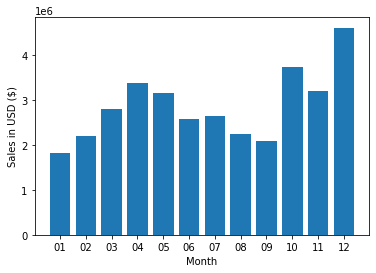

In [20]:
import matplotlib.pyplot as plt

# Generic function
get_x_data = lambda df, col: [x for x, y in df.groupby(col)]

months = get_x_data(final_data, 'Month')

plt.bar(months, sales_month_results['Sales'])
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')

### What city sold the most product?

In [21]:
sales_city_results = get_sales_results(final_data, 'City')
sales_city_results.sort_values('Sales')

,Quantity Ordered,Price Each,Sales
City,,,
Portland (ME),2750,447189.25,449758.27
Austin (TX),11153,1809873.61,1819581.75
Portland (OR),11303,1860558.22,1870732.34
Seattle (WA),16553,2733296.01,2747755.48
Dallas (TX),16730,2752627.82,2767975.40
Atlanta (GA),16602,2779908.20,2795498.58
Boston (MA),22528,3637409.77,3661642.01
New York City (NY),27932,4635370.83,4664317.43
Los Angeles (CA),33289,5421435.23,5452570.80


Text(0.5, 0, 'City')

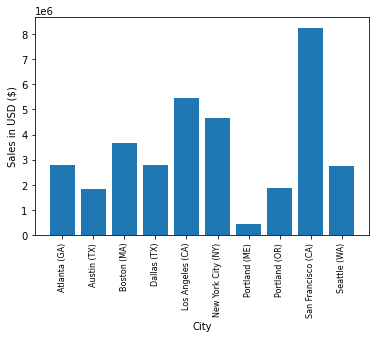

In [22]:
cities = get_x_data(final_data, 'City')

plt.bar(cities, sales_city_results['Sales'])
plt.xticks(rotation = 'vertical', size = 8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')